<a href="https://colab.research.google.com/github/lbeltran-adi/SemitronSeminar/blob/main/DigitalFiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First of all, let's import the data gathered from LT1752, ADA4077 and ADA4522

In [49]:
import pandas as pd

#Import the datasets:
url         = 'https://raw.githubusercontent.com/lbeltran-adi/SemitronSeminar/main/oscilloscope_data.csv'
lt1752_url  = 'https://raw.githubusercontent.com/lbeltran-adi/SemitronSeminar/main/LT1752_Low_Power.csv'
ada4077_url = 'https://raw.githubusercontent.com/lbeltran-adi/SemitronSeminar/main/ADA4077_Low_Noise.csv'
ada4522_url = 'https://raw.githubusercontent.com/lbeltran-adi/SemitronSeminar/main/ADA4522_Zero_Drift.csv'

#create a dataframe with each of them
adalm2000_df = pd.read_csv(url)
lt1752_df    = pd.read_csv(lt1752_url)
ada4077_df   = pd.read_csv(ada4077_url)
ada4522_df    = pd.read_csv(ada4522_url)


# Let's take the Oscilloscope Data when LT1752 was selected on the demo board...


In [ ]:
#@title Plot the LT1752 Data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Extract the data from the DataFrame
time = lt1752_df['Time(S)']
ch1 = lt1752_df['CH1(V)']

# Plot 'CH1(V)' against 'Time(s)'
plt.figure(figsize=(10, 6))
plt.plot(time, ch1)
plt.xlabel('Time (s)')
plt.ylabel('CH1 (V)')
plt.title('CH1 vs Time')
plt.grid(True)
plt.show()

# Calculate the RMS value
rms = np.sqrt(np.mean(np.square(ch1)))*1e3

print(f"RMS value: {rms} mVrms")

# ... and apply an averaging filter


*   The downsampling factor is equivalent to the Oversampling Ratio (OSR)
*   The output data rate decreases with OSR. It can be adjusted closer the signal frequency



In [ ]:
#@title Plot the LT1752 Data together with the averaged output
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Assuming you have a DataFrame named 'df' with columns 'Time(S)' and 'CH1(V)'

# Extract the data from the DataFrame
time = lt1752_df['Time(S)']
ch1 = lt1752_df['CH1(V)']

# Define the downsampling factor and averaging window size
downsample_factor = 16
window_size = 16

# Apply the digital filter, downsampling, and averaging
filtered_ch1 = signal.decimate(ch1, downsample_factor, zero_phase=True, axis=0)
filtered_time = signal.decimate(time, downsample_factor, zero_phase=True, axis=0)

# Calculate the number of samples to retain
num_samples = len(filtered_ch1) // window_size * window_size

# Average every 16 samples
filtered_ch1 = filtered_ch1[:num_samples].reshape(-1, window_size).mean(axis=1)
filtered_time = filtered_time[:num_samples:window_size]

# Create a new DataFrame with the filtered data
filtered_df = pd.DataFrame({'Time(S)': filtered_time, 'CH1(V)': filtered_ch1})

# Plot the original and filtered signals on the same figure
plt.figure(figsize=(10, 6))
plt.plot(time, ch1, label='Original CH1(V)')
plt.plot(filtered_time, filtered_ch1,'o-', label='Filtered CH1(V)')
plt.xlabel('Time (S)')
plt.ylabel('CH1 (V)')
plt.title('Original and Filtered CH1(V)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the RMS value
rms = np.sqrt(np.mean(np.square(ch1)))*1e3
rms_filtered = np.sqrt(np.mean(np.square(filtered_ch1)))*1e3
print(f"RMS value after filtering the data: {rms_filtered} mVrms, compared to the unfiltered {rms} mVrms")

# Let's use the data taken from ADALM2000 Oscilloscope
This the signal gathered on the oscilloscope when shorting the analog inputs:

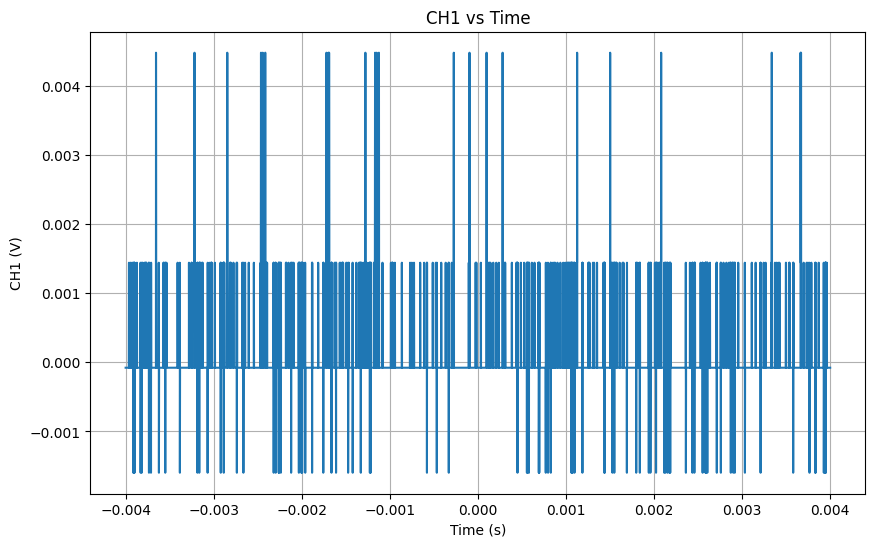

RMS value: 476.6075661659291 μ Vrms


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Extract the data from the DataFrame
time = adalm2000_df['Time(S)']
ch1 = adalm2000_df['CH1(V)']

# Plot 'CH1(V)' against 'Time(s)'
plt.figure(figsize=(10, 6))
plt.plot(time, ch1)
plt.xlabel('Time (s)')
plt.ylabel('CH1 (V)')
plt.title('CH1 vs Time')
plt.grid(True)
plt.show()

# Calculate the RMS value
rms = np.sqrt(np.mean(np.square(ch1)))*1e6

print(f"RMS value: {rms} \u03BC Vrms")

# Let's apply a FIR (Finite Impulse Response) filter

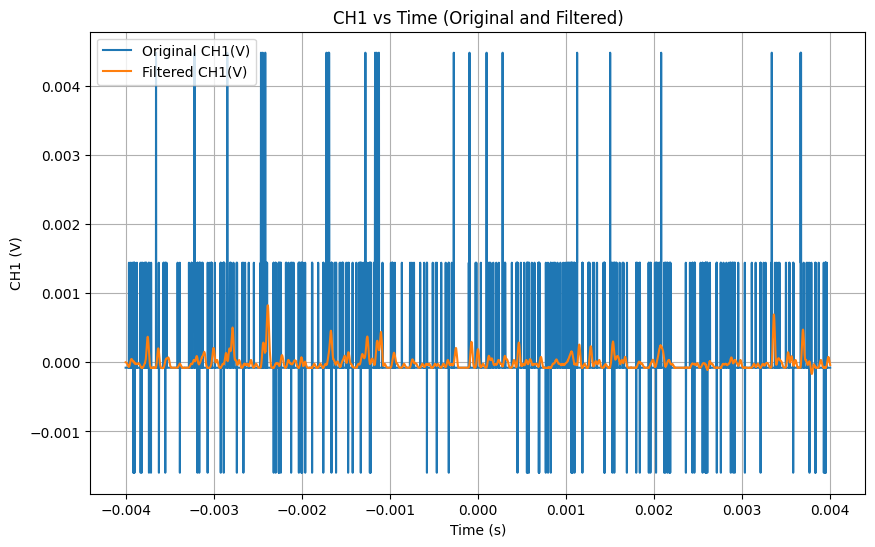

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Assuming you have a DataFrame named 'df' with columns 'Time(s)' and 'CH1(V)' like the importeed on the first Cell

# Extract the data from the DataFrame
time = adalm2000_df['Time(S)']
ch1 = adalm2000_df['CH1(V)']

# Design the FIR filter
order = 51  # Filter order
cutoff_freq = 1000  # Cutoff frequency in Hz
nyquist_freq = 0.5 / (time[1] - time[0])  # Nyquist frequency
normalized_cutoff = cutoff_freq / nyquist_freq
fir_coeffs = signal.firwin(order, normalized_cutoff)

# Apply the FIR filter to the data
filtered_ch1 = signal.lfilter(fir_coeffs, 1.0, ch1)

# Plot 'CH1(V)' against 'Time(s)' (Original and Filtered)
plt.figure(figsize=(10, 6))
plt.plot(time, ch1, label='Original CH1(V)')
plt.plot(time, filtered_ch1, label='Filtered CH1(V)')
plt.xlabel('Time (s)')
plt.ylabel('CH1 (V)')
plt.title('CH1 vs Time (Original and Filtered)')
plt.legend()
plt.grid(True)
plt.show()


# Let's apply an IIR (Infinite Impulse Response) filter

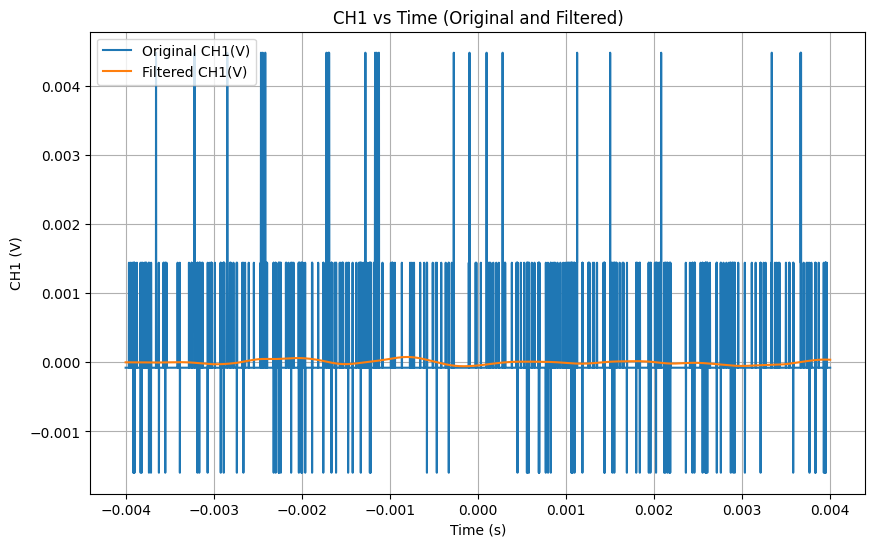

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Assuming you have a DataFrame named 'df' with columns 'Time(s)' and 'CH1(V)'

# Extract the data from the DataFrame
time = df['Time(S)']
ch1 = df['CH1(V)']

# Design the IIR filter
order = 4  # Filter order
cutoff_freq = 1000  # Cutoff frequency in Hz
b, a = signal.butter(order, cutoff_freq, fs=1/(time[1] - time[0]))

# Apply the IIR filter to the data
filtered_ch1 = signal.lfilter(b, a, ch1)

# Plot 'CH1(V)' against 'Time(s)' (Original and Filtered)
plt.figure(figsize=(10, 6))
plt.plot(time, ch1, label='Original CH1(V)')
plt.plot(time, filtered_ch1, label='Filtered CH1(V)')
plt.xlabel('Time (s)')
plt.ylabel('CH1 (V)')
plt.title('CH1 vs Time (Original and Filtered)')
plt.legend()
plt.grid(True)
plt.show()


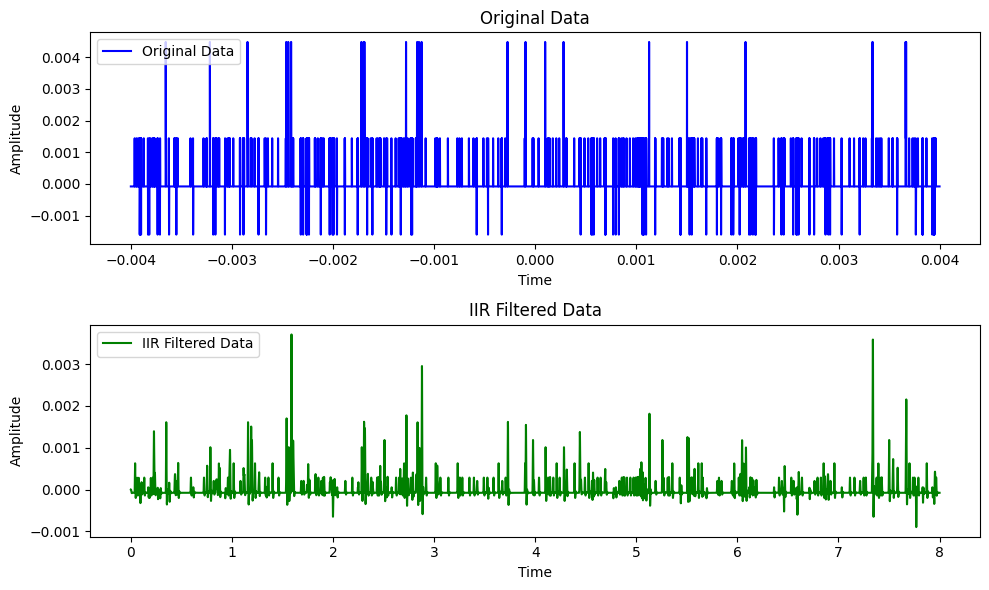

RMS value: 253.38634192255773 μ Vrms


In [ ]:
import numpy as np
import scipy.signal as signal

# Parameters
original_sampling_rate = 1000  # Original sampling rate
desired_sampling_rate = 4000  # Desired oversampling rate
cutoff_frequency = 100  # Cutoff frequency of the filters
order = 4  # IIR filter order

# Apply oversampling
resampled_signal = signal.resample(ch1, len(ch1) * (desired_sampling_rate // original_sampling_rate))

# Apply IIR filtering
b, a = signal.butter(order, cutoff_frequency / (desired_sampling_rate / 2), 'low')
iir_filtered_signal = signal.lfilter(b, a, resampled_signal)

# Plot the data before and after filtering
plt.figure(figsize=(10, 6))

# Plot original data
plt.subplot(2, 1, 1)
plt.plot(time, ch1, 'b', label='Original Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original Data')
plt.legend()

# Plot oversampled data after IIR filtering
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(iir_filtered_signal)) / desired_sampling_rate, iir_filtered_signal, 'g', label='IIR Filtered Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('IIR Filtered Data')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate the RMS value
rms = np.sqrt(np.mean(np.square(iir_filtered_signal)))*1e6

print(f"RMS value: {rms} \u03BC Vrms")

# Let's apply a SINC filter

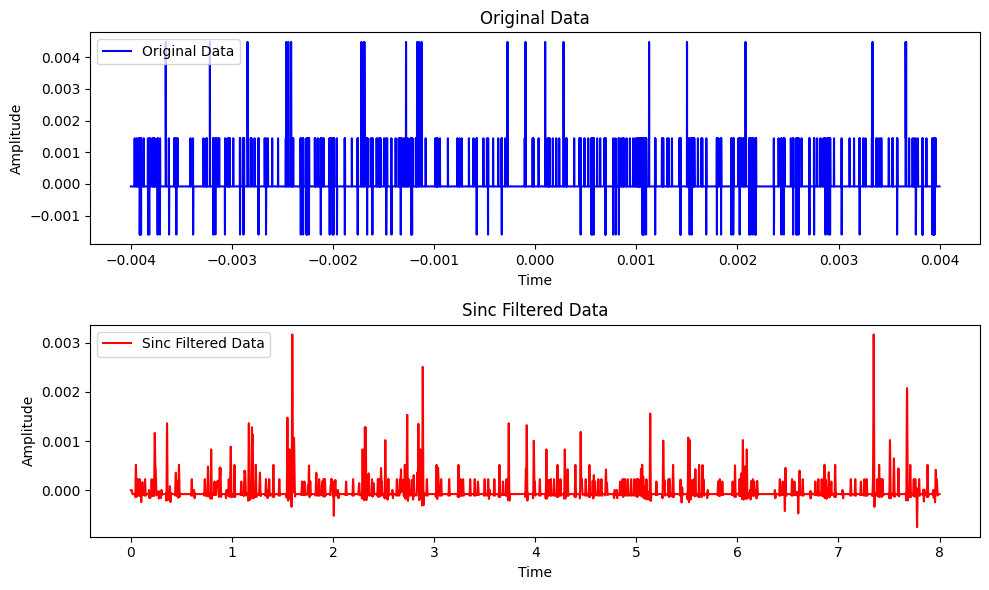

RMS value: 234.2751926157171 μ Vrms


In [ ]:
import numpy as np
import scipy.signal as signal

# Parameters
original_sampling_rate = 1000  # Original sampling rate
desired_sampling_rate = 4000  # Desired oversampling rate
cutoff_frequency = 100  # Cutoff frequency of the filters
filter_length = 101  # Sinc filter length

# Apply oversampling
resampled_signal = signal.resample(ch1, len(ch1) * (desired_sampling_rate // original_sampling_rate))

# Apply Sinc filtering
taps = signal.firwin(filter_length, cutoff_frequency, window='hamming', fs=desired_sampling_rate)
sinc_filtered_signal = signal.lfilter(taps, 1, resampled_signal)

# Plot the data before and after filtering
plt.figure(figsize=(10, 6))

# Plot original data
plt.subplot(2, 1, 1)
plt.plot(time, ch1, 'b', label='Original Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original Data')
plt.legend()

# Plot oversampled data after Sinc filtering
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(sinc_filtered_signal)) / desired_sampling_rate, sinc_filtered_signal, 'r', label='Sinc Filtered Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sinc Filtered Data')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the RMS value
rms = np.sqrt(np.mean(np.square(sinc_filtered_signal)))*1e6

print(f"RMS value: {rms} \u03BC Vrms")